# ✅ 1-qadam: Faylni yuklab olish va o‘qish

In [16]:
import pandas as pd

# CSV faylni yuklash (agar siz uni Colabga yuklagan bo‘lsangiz)
from google.colab import files
uploaded = files.upload()

# Faylni o‘qish
matches_df = pd.read_csv("WorldCupMatches.csv")

# Dastlabki 5 ta qatorni ko‘rish
matches_df.head()

Saving WorldCupMatches.csv to WorldCupMatches.csv


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


# ✅ 2-qadam: Tozalash va ustunlarni ko‘rish

Biz ular bilan ishlaymiz:

Year, Home Team Name, Away Team Name, Home Team Goals, Away Team Goals, Stadium, City

In [17]:
# Ustunlarni ko‘rib chiqamiz
matches_df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [18]:
# Ma’lumotlarning umumiy ko‘rinishi
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [19]:
# NaN qiymatlar soni
matches_df.isnull().sum()

,0
Year,3720
Datetime,3720
Stage,3720
Stadium,3720
City,3720
Home Team Name,3720
Home Team Goals,3720
Away Team Goals,3720
Away Team Name,3720
Win conditions,3720


# ✅ 3-qadam: O‘yinlar soni yillar bo‘yicha

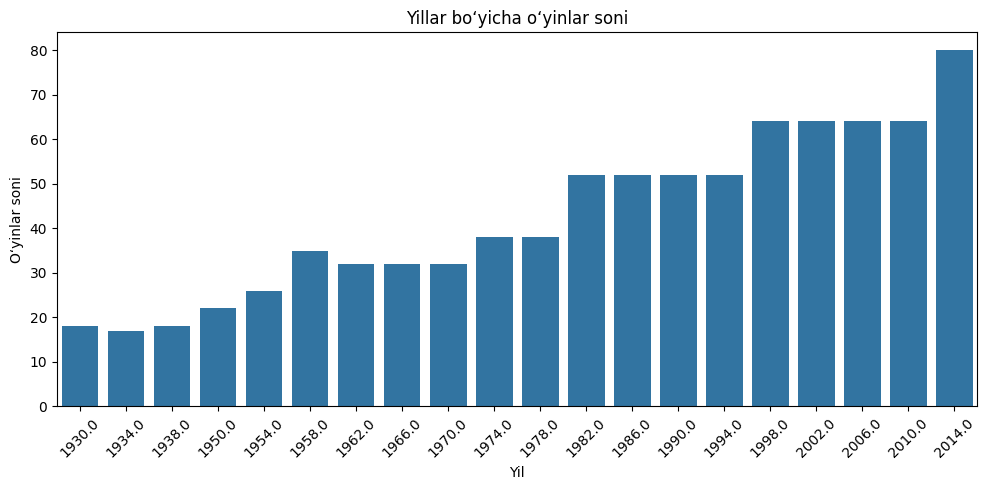

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x='Year', data=matches_df)
plt.xticks(rotation=45)
plt.title('Yillar bo‘yicha o‘yinlar soni')
plt.xlabel('Yil')
plt.ylabel('O‘yinlar soni')
plt.tight_layout()
plt.show()

# 🔍 Tekshiruv: Qancha ma’lumot takrorlangan?

In [21]:
# Nechta takroriy qatordan iboratligini tekshirish
matches_df.duplicated().sum()

np.int64(3735)

# 🧹 Tozalash: Takrorlangan qatorlarni olib tashlash

In [22]:
# Takroriy qatorlarni olib tashlaymiz
matches_df = matches_df.drop_duplicates()

# Yana bir marta 2014-yil o‘yinlar sonini tekshiramiz
matches_df[matches_df['Year'] == 2014].shape[0]

64

# ✅ Bonus: Takrorlanish nimaga bog‘liq bo‘lganini ko‘rish

Ba’zida datetime, stadium, yoki round kabi ustunlar sababli bir xil o‘yin bir nechta ko‘rinishda kiritilgan bo‘lishi mumkin. Shuning uchun Home Team Name, Away Team Name, Year, Datetime ustunlariga qarab aniqlashtirish mumkin.

In [23]:
matches_df[['Year', 'Datetime', 'Home Team Name', 'Away Team Name']].duplicated().sum()

np.int64(0)

# ⚽️ Tahlil rejasi: FIFA World Cup Matches

1.   Yillar bo‘yicha o‘yinlar soni (Year ustuni asosida):

        *   Har bir musobaqada nechta o‘yin o‘tkazilgan?

2.   Eng ko‘p g‘alaba qozongan jamoalar:

        *   G‘alaba soni (Win) bo‘yicha eng kuchli jamoalar.









# 🔧 Qanday boshlaymiz?
### Avvalo, yillar bo‘yicha o‘yinlar sonini chiqaramiz:

/tmp/ipython-input-38-1854599611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=games_per_year.index, y=games_per_year.values, palette="crest")


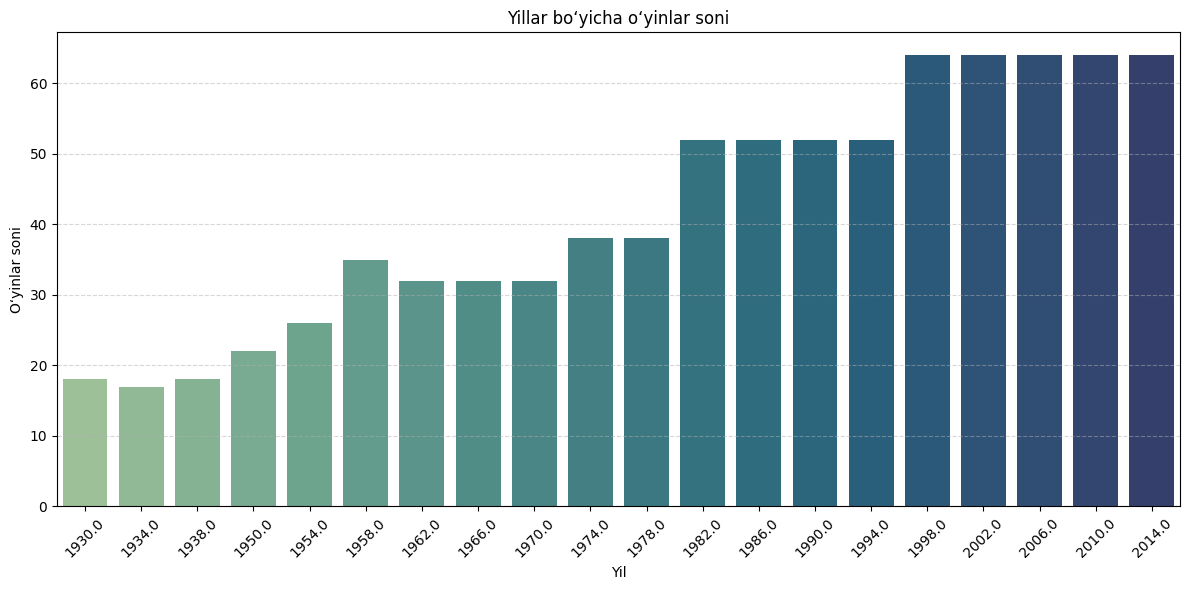

In [38]:
games_per_year = matches_df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, palette="crest")
plt.title("Yillar bo‘yicha o‘yinlar soni")
plt.xlabel("Yil")
plt.ylabel("O‘yinlar soni")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("images/games_per_year.png")
plt.show()

# 🎯 Maqsad:
Qaysi jamoalar eng ko‘p g‘alaba qozongan — ya’ni Win conditions ustunida "win" deb yozilgan o‘yinlar orqali aniqlaymiz.

# 📊 1. Eng ko'p g‘alaba qozongan jamoalarni sanash:

/tmp/ipython-input-32-2460632415.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winners.values, y=winners.index, palette="viridis")


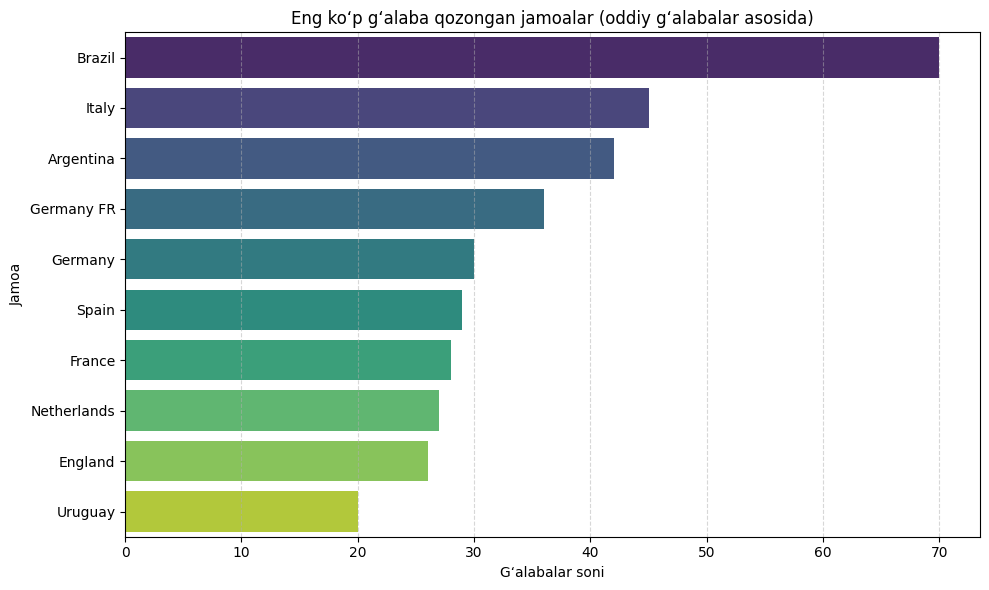

In [32]:
def get_winner(row):
    if row['Home Team Goals'] > row['Away Team Goals']:
        return row['Home Team Name']
    elif row['Home Team Goals'] < row['Away Team Goals']:
        return row['Away Team Name']
    else:
        return 'Draw'

# Har bir o‘yin uchun g‘olibni aniqlaymiz
matches_df['Winner'] = matches_df.apply(get_winner, axis=1)

# Faqat g‘oliblarni olib, g‘alaba sonini hisoblaymiz
winners = matches_df[matches_df['Winner'] != 'Draw']['Winner'].value_counts().head(10)

# Vizualizatsiya
plt.figure(figsize=(10,6))
sns.barplot(x=winners.values, y=winners.index, palette="viridis")
plt.title("Eng ko‘p g‘alaba qozongan jamoalar (oddiy g‘alabalar asosida)")
plt.xlabel("G‘alabalar soni")
plt.ylabel("Jamoa")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("images/top_match_winners.png")
plt.show()

# 🎯 “Eng ko‘p gol urgan jamoalar”

/tmp/ipython-input-37-2565693264.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='coolwarm')


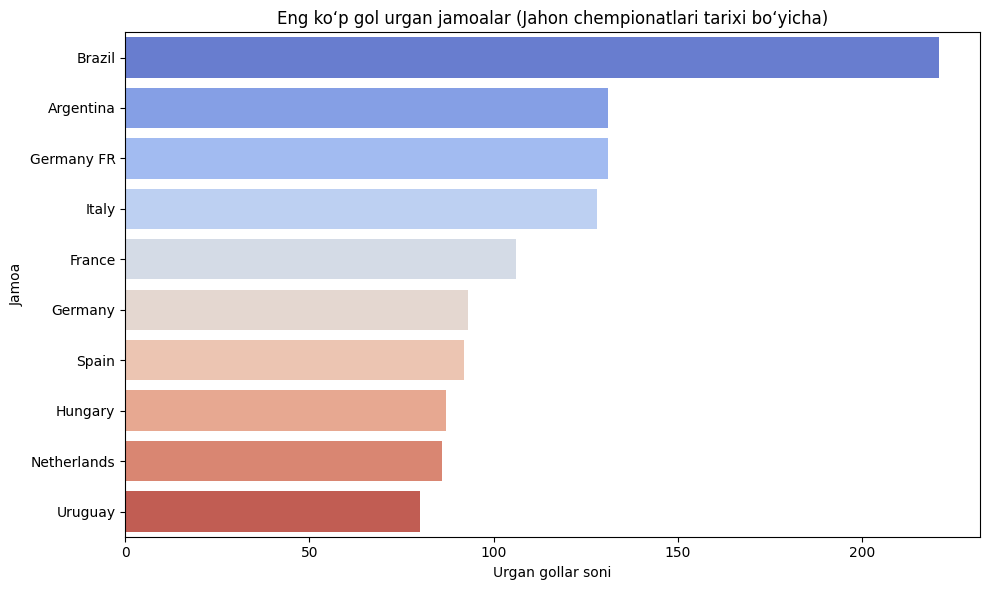

In [37]:
# Home team gollari
home_goals = matches_df.groupby('Home Team Name')['Home Team Goals'].sum()

# Away team gollari
away_goals = matches_df.groupby('Away Team Name')['Away Team Goals'].sum()

# Ikkalasini qo‘shamiz
total_goals = home_goals.add(away_goals, fill_value=0)

# Top 10 jamoani olish
top_teams = total_goals.sort_values(ascending=False).head(10)

# Grafik chizish
plt.figure(figsize=(10,6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='coolwarm')
plt.title("Eng ko‘p gol urgan jamoalar (Jahon chempionatlari tarixi bo‘yicha)")
plt.xlabel("Urgan gollar soni")
plt.ylabel("Jamoa")
plt.tight_layout()
plt.savefig("images/top_goal_scoring_teams.png")  # rasmni saqlash
plt.show()

# 📌 “Qaysi jamoa eng ko‘p o‘yin o‘tkazgan?”

/tmp/ipython-input-36-3091077213.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_played_teams.values, y=top_played_teams.index, palette='viridis')


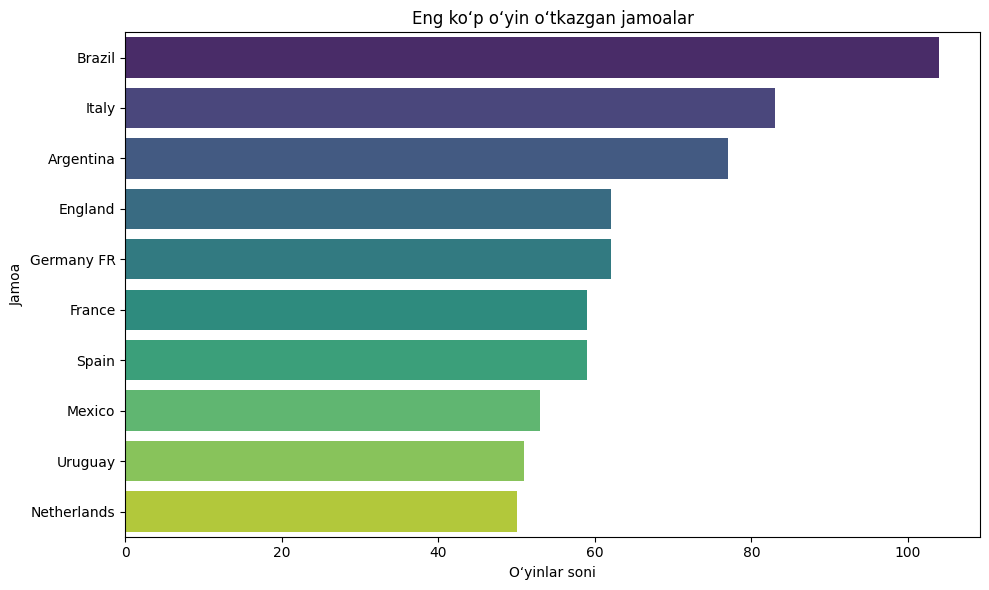

In [36]:
# Har bir jamoaning Home va Away sifatida qatnashgan o‘yinlari
home_matches = matches_df['Home Team Name'].value_counts()
away_matches = matches_df['Away Team Name'].value_counts()

# Ikkalasini qo‘shish
total_matches = home_matches.add(away_matches, fill_value=0)

# Eng ko‘p o‘yin o‘tkazgan 10 ta jamoa
top_played_teams = total_matches.sort_values(ascending=False).head(10)

# Grafik
plt.figure(figsize=(10,6))
sns.barplot(x=top_played_teams.values, y=top_played_teams.index, palette='viridis')
plt.title("Eng ko‘p o‘yin o‘tkazgan jamoalar")
plt.xlabel("O‘yinlar soni")
plt.ylabel("Jamoa")
plt.tight_layout()
plt.savefig("images/top_played_teams.png")
plt.show()